In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mozz99/wirelessinsite/main/resultados/dados.csv')
df['Distance (m)'] = df['Distance (m)']+18
df

,Rx,X(m),Y(m),Z(m),Distance (m),Path Loss (dB)
0,1,-1.307315e-08,-2.824705e-07,2.0,18.0,65.89
1,2,4.999755e-01,-4.948693e-03,2.0,18.5,71.45
2,3,9.999511e-01,-9.897104e-03,2.0,19.0,71.54
3,4,1.499927e+00,-1.484551e-02,2.0,19.5,71.98
4,5,1.999902e+00,-1.979393e-02,2.0,20.0,72.08
5,6,2.499878e+00,-2.474234e-02,2.0,20.5,72.18
6,7,2.999853e+00,-2.969075e-02,2.0,21.0,72.21
7,8,3.499829e+00,-3.463916e-02,2.0,21.5,71.37
8,9,3.999804e+00,-3.958757e-02,2.0,22.0,68.20
9,10,4.499780e+00,-4.453598e-02,2.0,22.5,73.29


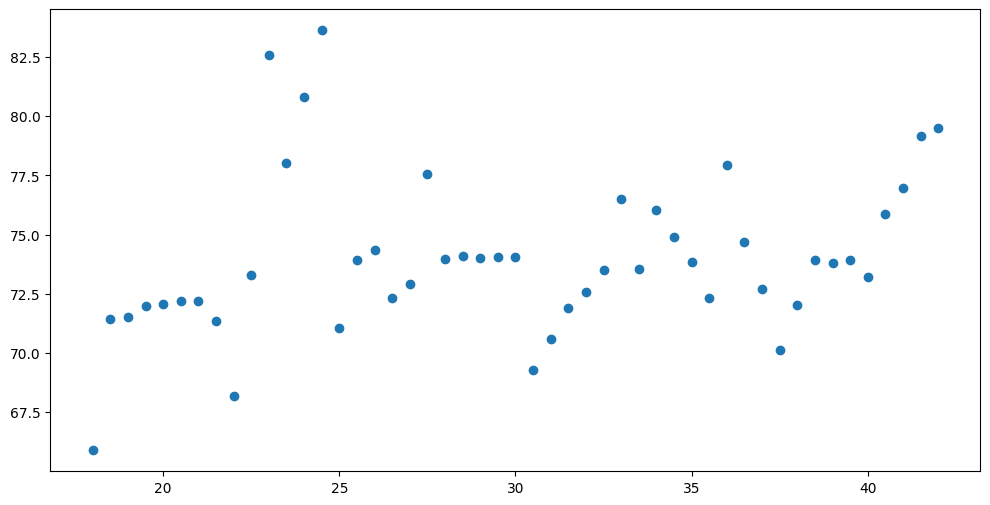

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df['Distance (m)'],df['Path Loss (dB)'])

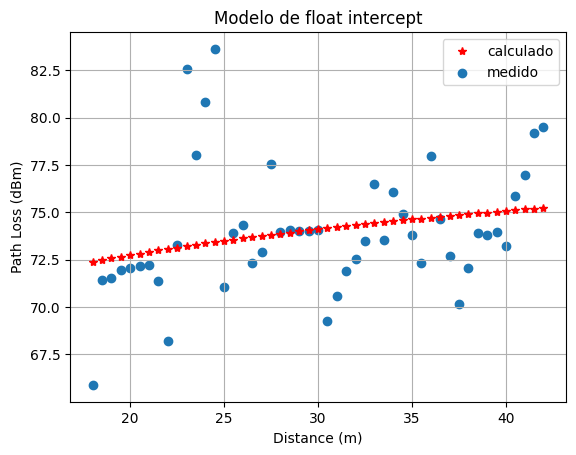

Erro Quadrático Médio (MSE): 3.2454075147151227


In [ ]:
#prx = df.Power

# Separando as colunas
d = df['Distance (m)']
pl = df['Path Loss (dB)']

# pl = prx

# Cálculo Beta
logd = 10 * np.log10(d)
b = (np.sum(logd)) ** 2
a = np.sum(logd ** 2)
denbeta = a - (b / len(logd))
numbeta = np.sum((logd * pl)) - ((np.sum(logd) * np.sum(pl)) / len(logd))
beta = numbeta / denbeta

# Cálculo alfa
y = np.sum(pl) / len(pl)
x = np.sum(logd) / len(logd)
alfa = y - beta * x

# Float Intercept
fi = alfa + 10 * beta * np.log10(d)

# Plot do gráfico
plt.figure()
plt.plot(d, fi,'*r',label='calculado')
plt.scatter(d, pl, label='medido')
plt.grid(True)
plt.xlabel('Distance (m)')
plt.ylabel('Path Loss (dBm)')
plt.title('Modelo de float intercept')
plt.legend()
plt.show()

# Cálculo do Erro Quadrático Médio (MSE)
MSE = np.sqrt(np.sum((pl - fi) ** 2) / len(pl))
print('Erro Quadrático Médio (MSE):', MSE)


In [ ]:
def root_mse(observed, predicted):
    mse = np.mean((predicted - observed) ** 2)
    rmse = np.sqrt(mse)
    return rmse
root_mse(pl,fi),alfa,beta

(3.2454075147151227, 62.66234875093326, 0.7748862519309683)

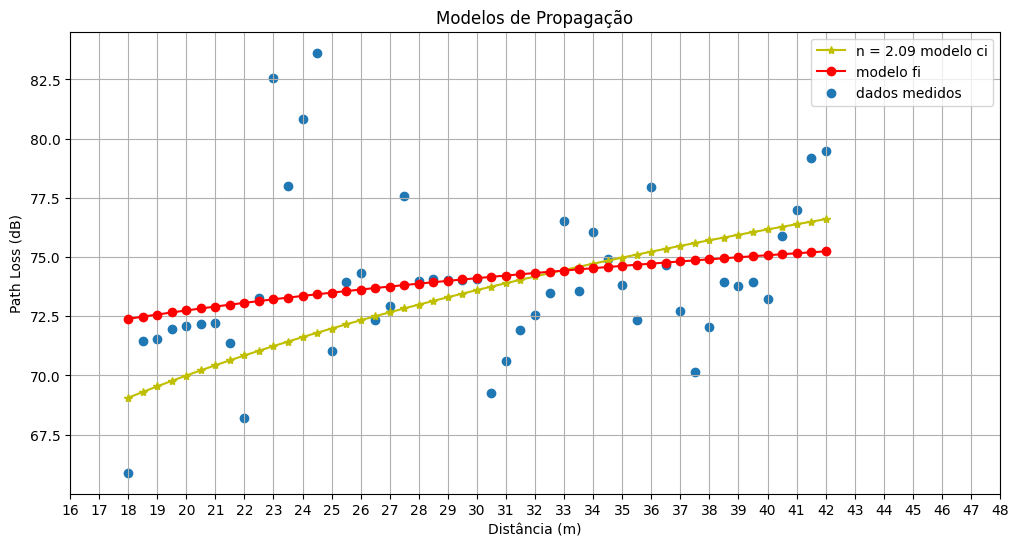

2.0885354942428407

In [ ]:

d0 = 1.010  # Distância de referência em metros

y = (3 * 10 ** 8) / (3.5 * 10 ** 9)

# Separando as colunas
d = df['Distance (m)']
pt = 51
L = df['Path Loss (dB)']


# Definição das variáveis de entrada
d0 = 1
prxo = pt - L[0]

Lo = 20 * np.log10((4 * np.pi) / y)  # path loss da primeira medida
D = 10 * np.log10(d / d0)
D = np.array(D)
n = np.linalg.lstsq(D.reshape(-1, 1), (L - Lo), rcond=None)[0]  # regressão linear

# Cálculo da potência do sinal recebido
ci = 20 * np.log10((4 * np.pi * d0) / y) + 10 * 2.05 * np.log10(d / d0)

# Plot do gráfico
plt.figure(figsize=(12,6))
plt.plot(d, ci,'-*y', label=f'n = {n[0]:.2f} modelo ci')
plt.plot(d,fi,'-or',label='modelo fi')
plt.scatter(d, pl,label='dados medidos')  # Use 'o-' para plotar pontos conectados por linhas
plt.grid(True)
plt.xticks(np.arange(16, 49, step=1))
plt.xlabel('Distância (m)')
plt.ylabel('Path Loss (dB)')
plt.title('Modelos de Propagação')
plt.legend()
plt.show()
n[0]

In [ ]:
def root_mse(observed, predicted):
    mse = np.mean((predicted - observed) ** 2)
    rmse = np.sqrt(mse)
    return rmse
root_mse(pl,ci)

3.5815669540591335